# Quality of SPN fit of the BN

In [1]:
import pickle
from scipy import stats
from spn.structure.Base import get_topological_order

bns = ["sprinkler", "asia", "sachs", "data/BayesianNetworks/child.bif", "water", "alarm", "data/BayesianNetworks/win95pts.bif", "andes"]
bn_names = ["sprinkler", "asia", "sachs", "child", "water", "alarm", "win95pts", "andes"]

for bn_name in bn_names:
    print(bn_name)
    for i in range(5):
        with open(f"../results/bayes_nets/SPN_fit/{bn_name}/ll_lps_{i}.pickle", "rb") as f:
            ll, lps = pickle.load(f)
        print(i)
        pears = stats.pearsonr(ll.flatten(), lps, alternative="greater")
        print(f"Pearson: {pears.statistic} ({'p < 0.001' if pears.pvalue < 0.001 else 'p >= 0.001'})")
        kend = stats.kendalltau(ll, lps, alternative="greater")
        print(f"Kendall: {kend.statistic} ({'p < 0.001' if kend.pvalue < 0.001 else 'p >= 0.001'})")
        spear = stats.spearmanr(ll, lps, alternative="greater")
        print(f"Spearman: {spear.statistic} ({'p < 0.001' if spear.pvalue < 0.001 else 'p >= 0.001'})")
        try:
            with open(f"../results/bayes_nets/SPN_fit/{bn_name}/TV_{i}.txt", "r") as f:
                print(f"Total variation: {f.readline()}")
        except:
            pass
    print()


sprinkler
0
Pearson: 0.959327799993944 (p < 0.001)
Kendall: 0.9963330606129307 (p < 0.001)
Spearman: 0.9996540331042487 (p < 0.001)
Total variation: 0.08275792286409835
1
Pearson: 0.9922839406500662 (p < 0.001)
Kendall: 0.9999999999999998 (p < 0.001)
Spearman: 1.0 (p < 0.001)
Total variation: 0.018125660889804746
2
Pearson: 0.991859876231528 (p < 0.001)
Kendall: 0.9999901076289965 (p < 0.001)
Spearman: 0.9999999621759398 (p < 0.001)
Total variation: 0.019055984603945253
3
Pearson: 0.995597515586208 (p < 0.001)
Kendall: 0.9999899956981502 (p < 0.001)
Spearman: 0.9999999620606237 (p < 0.001)
Total variation: 0.01678173605908671
4
Pearson: 0.9984097846107794 (p < 0.001)
Kendall: 1.0 (p < 0.001)
Spearman: 0.9999999999999998 (p < 0.001)
Total variation: 0.021280871684054264

asia
0
Pearson: 0.9863365707329254 (p < 0.001)
Kendall: 0.9916007225513612 (p < 0.001)
Spearman: 0.9994727929084148 (p < 0.001)
Total variation: 0.0740266805419594
1
Pearson: 0.9728642955798001 (p < 0.001)
Kendall: 0.98

In [2]:
best_i = {"sprinkler": 3, "asia": 3, "sachs": 0, "child": 3, "water": 2, "alarm": 1, "win95pts": 3, "andes": 1}

mapping = {
    "pearson": "Pearson coefficient",
    "kendall": "Kendall ($\\tau$-b) coeff.",
    "spearman": "Spearman coefficient",
}
print(" & " + " & ".join(bn_names) + " \\\\")
for method in ["pearson", "kendall", "spearman"]:
    print(mapping[method], end="")
    for bn_name in bn_names:
        i = best_i[bn_name]
        with open(f"../results/bayes_nets/SPN_fit/{bn_name}/ll_lps_{i}.pickle", "rb") as f:
            ll, lps = pickle.load(f)
        if method == "pearson":
            corr = stats.pearsonr(ll.flatten(), lps, alternative="greater")
        elif method == "kendall":
            corr = stats.kendalltau(ll, lps, alternative="greater")
        else:
            corr = stats.spearmanr(ll, lps, alternative="greater")
        print(f" & \\scinumthree{{{corr.statistic}}}", end="")
    print(" \\\\")

print("Total variation", end="")
for bn_name in bn_names:
    i = best_i[bn_name]
    try:
        with open(f"../results/bayes_nets/SPN_fit/{bn_name}/TV_{i}.txt", "r") as f:
            print(f" & \\scinumthree{{{f.readline()}}}", end="")
    except:
        print(f" & - ", end="")
print(" \\\\")


 & sprinkler & asia & sachs & child & water & alarm & win95pts & andes \\
Pearson coefficient & \scinumthree{0.995597515586208} & \scinumthree{0.9904676422599106} & \scinumthree{0.9641805173132209} & \scinumthree{0.9536775854116192} & \scinumthree{0.9545117295765658} & \scinumthree{0.958628982215472} & \scinumthree{0.958702295927348} & \scinumthree{0.7927616140800642} \\
Kendall ($\tau$-b) coeff. & \scinumthree{0.9999899956981502} & \scinumthree{0.9923282116697103} & \scinumthree{0.8604481178488093} & \scinumthree{0.8532721648881109} & \scinumthree{0.8276796824135025} & \scinumthree{0.8917318963387559} & \scinumthree{0.8910432936336679} & \scinumthree{0.5995275275275276} \\
Spearman coefficient & \scinumthree{0.9999999620606237} & \scinumthree{0.9995258982997313} & \scinumthree{0.9722032535135513} & \scinumthree{0.9657509870049914} & \scinumthree{0.961081470695559} & \scinumthree{0.9776917891488991} & \scinumthree{0.9767489912465076} & \scinumthree{0.7880873960873962} \\
Total variatio

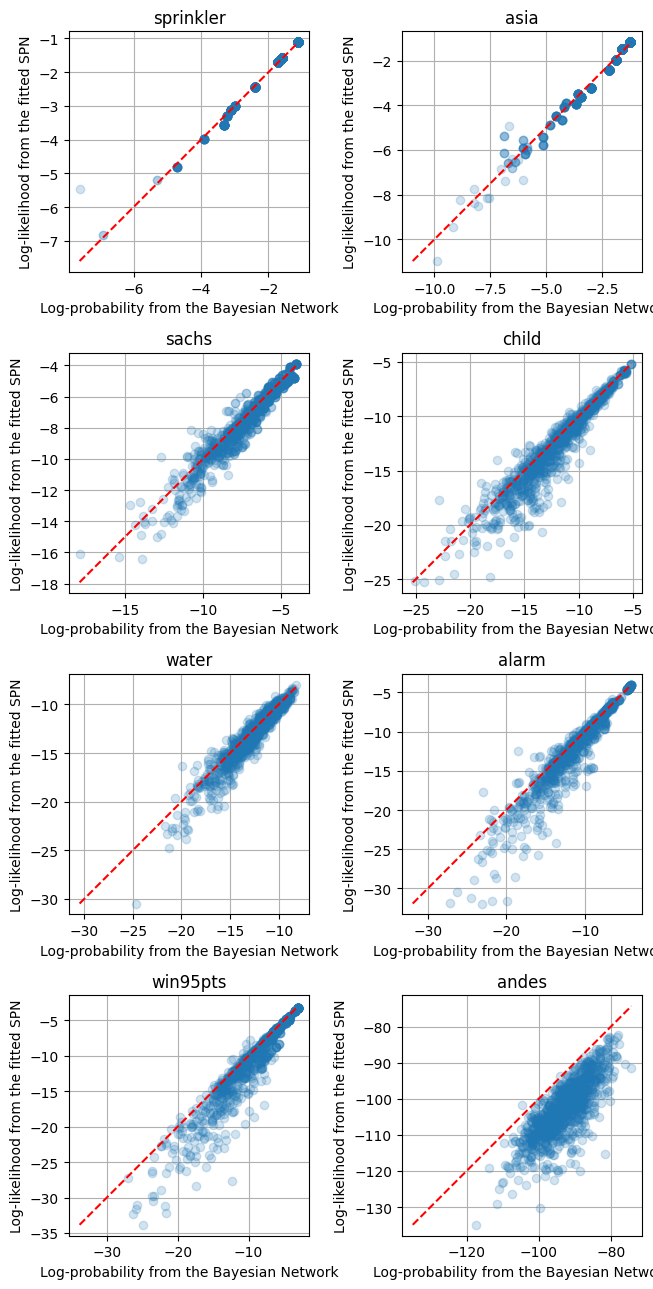

In [3]:
import pickle
import  matplotlib.pyplot as  plt

fig, axes = plt.subplots(4, 2, figsize=(7, 13))

for i, bn_name in enumerate(bn_names):
    ax = axes[i//2][i%2]
    with open(f"../results/bayes_nets/SPN_fit/{bn_name}/ll_lps_{best_i[bn_name]}.pickle", "rb") as f:
        ll, lps = pickle.load(f)

    mi = min(ll.min(), lps.min())
    ma = max(ll.max(), lps.max())

    ax.grid(True, zorder=0)
    ax.plot([mi, ma], [mi, ma], "r--", zorder=10)
    ax.scatter(lps, ll, zorder=2, alpha=0.2)
    ax.set_xlabel("Log-probability from the Bayesian Network")
    ax.set_ylabel("Log-likelihood from the fitted SPN")
    ax.set_title(f'{bn_name.split(".")[0]}')
    ax.set_aspect('equal', 'box')

fig.tight_layout()
plt.savefig(f"plots/SPN_BN_correlation.pdf")

# CEs evaluation on the BN samples

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

path_base = "../results/bayes_nets"

with open(path_base + "/results.pickle", "rb") as f:
    smaller_results = pickle.load(f)

data_names = ["asia", "alarm", "win95pts"]

results = {}
for data_name in data_names:
    results[data_name] = {
        "LiCE_optimize": smaller_results[data_name][f"LiCE_optimize"],
        "LiCE_median": smaller_results[data_name][f"LiCE_median"],
        "MIO + SPN": smaller_results[data_name][f"MIO_no_spn"],
        "VAE + SPN": smaller_results[data_name]["VAE"],
        "DiCE + SPN": smaller_results[data_name]["DiCE"],
        "CH-CVAE ": smaller_results[data_name]["CVAE"],
        "FACE_knn": smaller_results[data_name]["FACE_knn"],
        "FACE_eps": smaller_results[data_name]["FACE_eps"],
        "PROPLACE": smaller_results[data_name]["PROPLACE"],
    }

In [5]:
res_type = "valid"

name_map = {
    "LiCE_optimize": "LiCE ($\\alpha=1$)",
    "LiCE_median": "LiCE (med)",
    "MIO + SPN": "MIO (+spn)",

    "VAE + SPN": "VAE (+spn)",
    "DiCE + SPN": "DiCE (+spn)",
    "CH-CVAE ": "C-CHVAE",
    "FACE_knn": "FACE (knn)",
    "FACE_eps": "FACE ($\\epsilon$)",
    "PROPLACE": "PROPLACE",
}

order = ["VAE + SPN", "DiCE + SPN", "CH-CVAE ", "FACE_knn", "FACE_eps", "PROPLACE", "MIO + SPN", "LiCE_median", "LiCE_optimize"]

for data_name in data_names:
    print("-----", data_name)
    print(f"method\t\tll_spn\tlp_bn\tdist.\tsparsi.\ttime\tvalid %")
    for method in order:
        curr_res = results[data_name][method]
        mean_sparsity = np.mean([res[res_type]["sparsity"] for res in curr_res.values() if res_type in res])
        std_sparsity = np.std([res[res_type]["sparsity"] for res in curr_res.values() if res_type in res])
        mean_ll = np.mean([res[res_type]["ll"] for res in curr_res.values() if res_type in res])
        std_ll = np.std([res[res_type]["ll"] for res in curr_res.values() if res_type in res])

        lp = [res[res_type]["bn_prob"] for res in curr_res.values() if res_type in res]
        mean_lp = np.mean(lp)
        std_lp = np.std(lp)

        mean_dist = np.mean([res[res_type]["distance"] for res in curr_res.values() if res_type in res])
        std_dist = np.std([res[res_type]["distance"] for res in curr_res.values() if res_type in res])
        mean_time = np.mean([res[res_type]["time"] for res in curr_res.values() if res_type in res])
        std_time = np.std([res[res_type]["time"] for res in curr_res.values() if res_type in res])
        mean_existence = np.mean([res_type in res for res in curr_res.values()])
        print(f"{name_map[method]} & \\scinum{{{mean_ll}}} $\\pm$ \\scinum{{{std_ll}}} & \\scinumg{{{mean_lp}}} $\\pm$ \\scinumg{{{std_lp}}} & \\scinum{{{mean_dist}}} $\\pm$ \\scinum{{{std_dist}}} & \\scinum{{{mean_sparsity}}} $\\pm$ \\scinum{{{std_sparsity}}} & \\scinum{{{mean_time}}} $\\pm$ \\scinum{{{std_time}}} s & {mean_existence*100:.4g} \\% \\\\")


----- asia
method		ll_spn	lp_bn	dist.	sparsi.	time	valid %
VAE (+spn) & \scinum{-1.1729320597171673} $\pm$ \scinum{0.0119680000631051} & \scinumg{0.29036197574999995} $\pm$ \scinumg{0.0} & \scinum{3.8766082579378605} $\pm$ \scinum{3.3745551164852463} & \scinum{2.180257510729614} $\pm$ \scinum{1.1542591116289067} & \scinum{0.01703683347640896} $\pm$ \scinum{0.004392178581538655} s & 46.6 \% \\
DiCE (+spn) & \scinum{-1.1729320597171673} $\pm$ \scinum{0.0119680000631051} & \scinumg{0.29036197574999995} $\pm$ \scinumg{0.0} & \scinum{3.8766082579378605} $\pm$ \scinum{3.3745551164852463} & \scinum{2.180257510729614} $\pm$ \scinum{1.1542591116289067} & \scinum{11.85950342575109} $\pm$ \scinum{2.980128290394942} s & 46.6 \% \\
C-CHVAE & \scinum{-2.5177194895073254} $\pm$ \scinum{1.7787497901339846} & \scinumg{0.15946395257510726} $\pm$ \scinumg{0.09691711541624397} & \scinum{2.3689661785790146} $\pm$ \scinum{2.3726639529598827} & \scinum{1.2660944206008584} $\pm$ \scinum{0.6468880471852823} & 

/home/epanemu/.miniconda/envs/Expl/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/epanemu/.miniconda/envs/Expl/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/epanemu/.miniconda/envs/Expl/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/epanemu/.miniconda/envs/Expl/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/epanemu/.miniconda/envs/Expl/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Statistical tests

In [6]:
import matplotlib.pyplot as plt

def show_plot(n, vals, names, name, path):
    k = len(vals)
    if k not in [6, 7, 8, 9]:
        print("TODO")
    # Nemenyi with alpha 0.05
    q = {
        6: 2.849705382,
        7: 2.948319908,
        8: 3.030878867,
        9: 3.10173026,
    }[k]
    cd = q * np.sqrt((k * (k+1)) / (6 * n))

    limits=(k,1)

    fig, ax = plt.subplots(figsize=(8,2.5))

    # set up plot
    ax.set_xlim(limits)
    ax.set_ylim(0,1)
    ax.spines['top'].set_position(('axes', 0.6))
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_visible(False)
    for pos in ["bottom", "left", "right"]:
        ax.spines[pos].set_visible(False)

    # CD bar
    ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
    ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
    ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k")
    ax.text(limits[0]-cd/2., 0.92, "CD", ha="center", va="bottom")

    # annotations
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
    kw = dict(xycoords='data',textcoords="axes fraction",
            arrowprops=arrowprops, bbox=bbox_props, va="center")
    pos = []
    pos_back = []
    first_h = 0.45
    h_diff = 0.15
    for i in range(k//2):
        pos.append((0, first_h - i*h_diff))
        pos_back.insert(0, (1, first_h - i*h_diff))
    if k % 2 == 1:
        pos.append((0.5, pos[-1][1] - 6*h_diff/11))
    pos += pos_back

    for i in range(len(names)):
        if k % 2 == 1 and i == k // 2:
            ax.annotate(names[i], xy=(vals[i], 0.6), xytext=pos[i], ha="center",  **kw)
        else:
            ax.annotate(names[i], xy=(vals[i], 0.6), xytext=pos[i], ha="right" if i > k//2 - 1 else "left",  **kw)

    #bars
    hs = [0.56, 0.53, 0.5]
    li = 0
    lend = -1
    ends = [-1, -1, -1]
    for i in range(len(names)):
        for j in range(3):
            if i > ends[j]:
                li = j
                break
        j = i
        while j+1 < len(names) and vals[i] - vals[j+1] < cd:
            j += 1
        if j != i and lend != j:
            ax.plot([vals[i], vals[j]], [hs[li],hs[li]], color="k", lw=3)
            ends[li] = j
            lend = j
            li += 1
        if j == len(names) - 1:
            break
    plt.title(name)
    plt.savefig(f"{path}/{name}.pdf")

 & VAE (+spn) & DiCE (+spn) & C-CHVAE & FACE (knn) & FACE ($\epsilon$) & PROPLACE & MIO (+spn) & LiCE (med) & LiCE ($\alpha=1$) \\
asia & \scinumthree{4.866} & \scinumthree{4.866} & \scinumthree{6.242} & \scinumthree{6.221} & \scinumthree{7.603} & \scinumthree{6.672} & \scinumthree{2.529} & \scinumthree{2.35} & \scinumthree{3.651} \\
alarm & \scinumthree{6.789} & \scinumthree{7.642} & \scinumthree{6.263} & \scinumthree{4.672} & \scinumthree{5.369} & \scinumthree{5.427} & \scinumthree{3.57} & \scinumthree{2.254} & \scinumthree{3.014} \\
win95pts & \scinumthree{7.702} & \scinumthree{6.029} & \scinumthree{5.146} & \scinumthree{4.341} & \scinumthree{6.054} & \scinumthree{4.916} & \scinumthree{3.717} & \scinumthree{3.209} & \scinumthree{3.886} \\


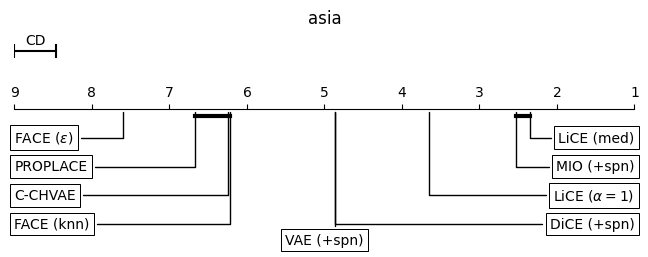

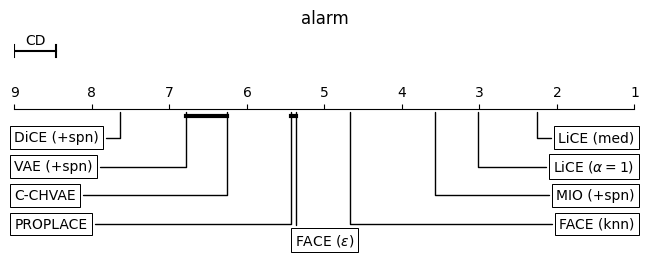

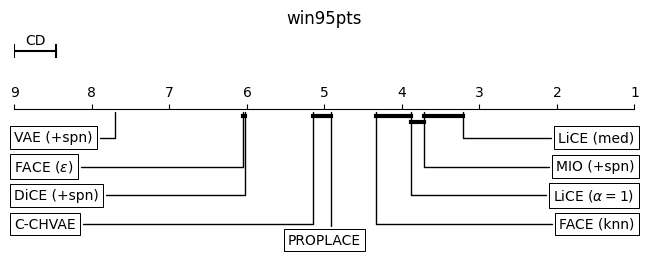

In [7]:
from scipy import stats
import scikit_posthocs as sp

res_type = "valid"

print(" & " + " & ".join([name_map[o] for o in order]) + " \\\\")
for data_name in data_names:
    print(data_name, end = " & ")
    test_data = []
    for method in order:
        curr_res = results[data_name][method]
        test_data.append([curr_res[i][res_type]["bn_prob"] if res_type in curr_res[i] else -1 for i in curr_res])
    if stats.friedmanchisquare(*test_data).pvalue >= 0.001:
        print("Friedman test failed!!")
    td = -np.array(test_data)
    ranks = np.mean(stats.rankdata(td, axis=0), axis=1)
    print(" & ".join([f"\\scinumthree{{{r}}}" for r in ranks]) + " \\\\")

    ord = np.argsort(-ranks)
    show_plot(td.shape[1], ranks[ord], [name_map[order[i]] for i in ord], data_name, path="plots/nemenyi_all")


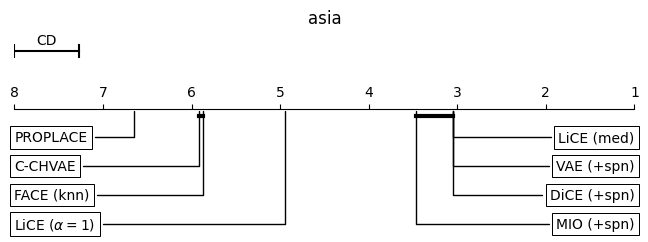

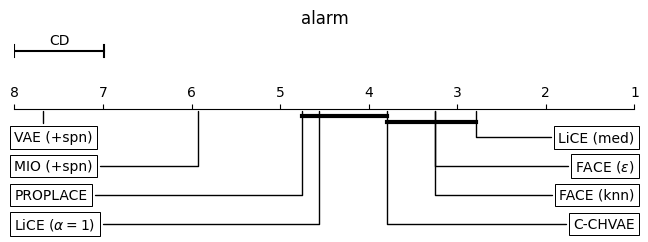

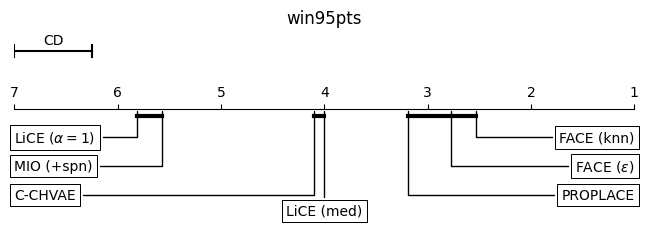

In [8]:
from scipy import stats

res_type = "valid"

order = ["DiCE + SPN", "VAE + SPN", "CH-CVAE ", "FACE_knn", "FACE_eps", "PROPLACE", "MIO + SPN", "LiCE_median", "LiCE_optimize"]

for data_name in data_names:
    test_data = []
    order_names = []
    all_valid = list(list(results[data_name].values())[0].keys())
    for method in order:
        if (method == "FACE_eps" and data_name == "asia") or (method == "DiCE + SPN" and data_name == "alarm") or (method == "VAE + SPN" and data_name == "win95pts") or (method == "DiCE + SPN" and data_name == "win95pts"):
            continue
        all_valid = [i for i in all_valid if res_type in results[data_name][method][i]]
        order_names.append(method)
    for method in order:
        if (method == "FACE_eps" and data_name == "asia") or (method == "DiCE + SPN" and data_name == "alarm") or (method == "VAE + SPN" and data_name == "win95pts") or (method == "DiCE + SPN" and data_name == "win95pts"):
            continue
        curr_res = results[data_name][method]
        test_data.append([curr_res[i][res_type]["bn_prob"] for i in all_valid])
    if stats.friedmanchisquare(*test_data).pvalue >= 0.001:
        print("Friedman test failed!!")
    td = -np.array(test_data)
    ranks = np.mean(stats.rankdata(td, axis=0), axis=1)

    ord = np.argsort(-ranks)
    show_plot(td.shape[1], ranks[ord], [name_map[order_names[i]] for i in ord], data_name, path="plots/nemenyi_intersect")
